In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from time import time

In [2]:
def plot(x, y, ax, title, xlabel="", ylabel="", c="r"):
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid()
    _ = ax.plot(x, y, c=c)

# Logistic Regression

Logistic Regression is …

* a **supervised** model mapping from a set of training examples to associated labels.
* used for **classification** tasks $\rightarrow$ can be used for **[binary](#Binary-Classification)** or **[multinomial](#Multinomial-(Multi-class)-Classification)** classification.
* a **discriminative classifier** $\rightarrow$ it learns to distinguish classes from one another.
* the **basic building block of a neural network**.
* often used as a **baseline** classification model.

### Building Blocks

1. **Training examples** $\mathbf{X}$ consisting of $m$ feature vectors $\mathbf{X}=[\mathbf{x}^{(1)},\mathbf{x}^{(2)},\dots,\mathbf{x}^{(m)}]$, where each $\mathbf{x}^{(i)}$ contains $n$ features $[x_1, x_2, \dots, x_n]^{(i)}$.
2. **Ground truth labels** $\mathbf{y}$ where $y^{(i)}$ is the correct label associated with $\mathbf{x}^{(i)}$.
3. **Model parameters** $\theta$ consisting of a **weights vector** $\mathbf{w}$ containing a weight for each input feature $[w_1, w_2, \dots, w_n]$ and a **bias term** $b$. 
4. A **classification function** mapping from training/test examples to an estimated label $\hat{y}$ (e.g. the sigmoid or softmax function).
5. An **objective function** $L$ for learning (e.g. cross-entropy loss).
6. An **optimization algorithm** that optimizes the objective function (e.g. gradient descent).

## Binary Classification

For binary classification, our observations can either belong to a class or not, i.e., our output labels can take values of $y^{(i)}\in [0,1]$.

### The Sigmoid Function

The sigmoid function $\sigma$ maps any given real input value to the range $[0,1]$. In other words, it assigns a "probability" that out $i$-th input belongs to class 1. Its equation is:
$$\sigma(z)=\frac{1}{1+e^{-z}}\quad\text{where}\quad z^{(i)}=\mathbf{w}\cdot{\mathbf{x}^{(i)}}+b=\sum_{j=1}^nw_jx^{(i)}_j+b$$

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

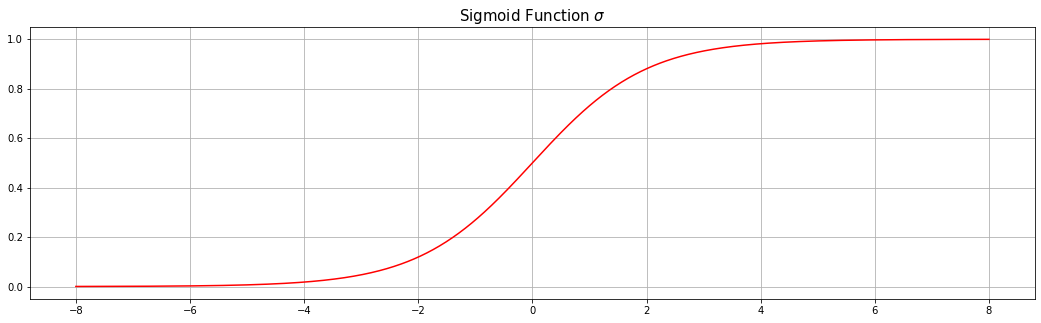

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(18,5))
plot([z for z in np.linspace(-8,8,1000)], [sigmoid(z) for z in np.linspace(-8,8,1000)], ax, "Sigmoid Function $\sigma$")

### The Binary Cross-Entropy Loss Function
Our sigmoid function generates a probability $\hat{y}^{(i)}$ estimating the likelihood that the $i$-th input example belongs to class 1. Now, we want to learn our (initially random) model parameters $\mathbf{w}$ and $b$ such that this estimation is good over all training examples. In other words, for inputs where the associated ground truth label $y^{(i)}=0$ our estimation should also be close to $0$, i.e., $\hat{y}^{(i)}\approx0$, and if $y^{(i)}=1$, then $\hat{y}^{(i)}\approx1$ should be the case.

We calculate an intuition of how "wrong our model predicts classes" by means of the cross-entropy loss function. It measures the distance between $\mathbf{y}$ and $\mathbf{\hat{y}}$.

$$L(\mathbf{\hat{y}},\mathbf{y})=\text{How much differs }\mathbf{\hat{y}}\text{ from the true }\mathbf{y}$$

#### Derivation

We choose parameters parameters $\mathbf{w}$ and $b$ such that we maximize the probability of the true $\mathbf{y}$ labels given our training data $\mathbf{X}$. For simplicity, we omit the $i$ superscript here:

$$p(y\vert \mathbf{x})=\hat{y}^y(1-\hat{y})^{(1-y)}$$


Remember that $y\in [0,1]$, that is, if $\hat{y}=y$ we obtain a probability of $p=1$. Taking the negative log yields our cross-entropy loss function:

$$L_{CE}(\hat{y},y)=-\log{p(y\vert \mathbf{x})} = -\big(y\log{\hat{y}}+(1-y)\log{(1-\hat{y})}\big)$$

In [5]:
def ce_loss(y_hat, y):
    return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

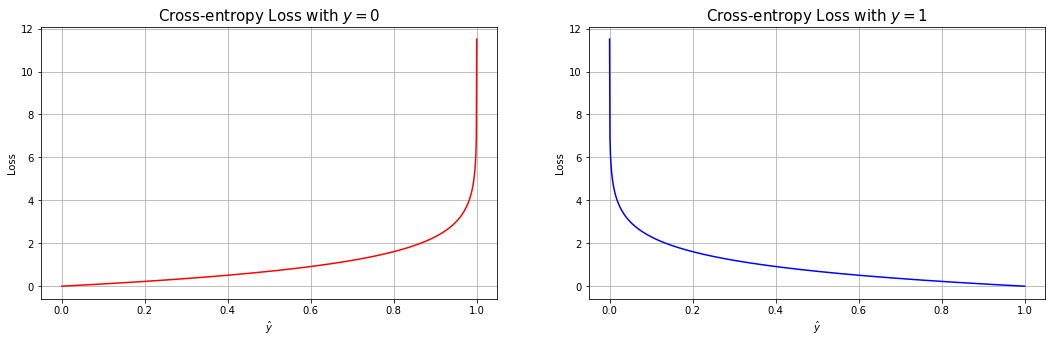

In [6]:
y_hat = np.linspace(1e-5, 1-1e-5, 1000)
fig, axs = plt.subplots(1, 2, figsize=(18,5))
plot(y_hat, ce_loss(y_hat, np.array([0] * len(y_hat))), axs[0], "Cross-entropy Loss with $y=0$", "$\hat{y}$", "Loss")
plot(y_hat, ce_loss(y_hat, np.array([1] * len(y_hat))), axs[1], "Cross-entropy Loss with $y=1$", "$\hat{y}$", "Loss", "b")

### Gradient Descent

We use gradient descent to find the optimal parameters $\theta = \mathbf{w},b$ by minimizing our loss function over all training examples: we calculate the gradient of the loss function w.r.t. our parameters and take a step in the opposite direction ("down the slope" in case of one variable). The gradient for logistic regression can be derived as follows:

#### Derivation

$$
\frac{\partial L_{CE}}{\partial w_j} = \frac{\partial}{\partial w_j}-\big(y\log{\hat{y}}+(1-y)\log{(1-\hat{y})}\big) 
$$

For the sake of simplicity, replace $\sigma(w \cdot x + b)$ with $\sigma(\cdot)$:
$$
= -\Big(\frac{\partial}{\partial w_j} y\log{\sigma(\cdot)}+ \frac{\partial}{\partial w_j} (1-y)\log{(1-\sigma(\cdot))} \Big)
$$

Applying the chain rule yields:
$$
= -\frac{y}{\sigma(\cdot)}\frac{\partial}{\partial w_j}\sigma(\cdot)-\frac{1-y}{1-\sigma(\cdot)}\frac{\partial}{\partial w_j}1-\sigma(\cdot)
$$

Factoring out the partial derivative yields:
$$
- \Big(\frac{y}{\sigma(\cdot)}-\frac{1-y}{1-\sigma(\cdot)} \Big)\frac{\partial}{\partial w_j}\sigma(\cdot)
$$

Summarize the first fraction and apply the chain rule:
$$
=-\Big(\frac{y-\sigma(\cdot)}{\sigma(\cdot)+(1-\sigma(\cdot))} \Big)\sigma(\cdot)(1-\sigma(\cdot))\frac{\partial (w\cdot x + b)}{\partial w_j}
$$

$$
=-\Big(\frac{y-\sigma(\cdot)}{\sigma(\cdot)+(1-\sigma(\cdot))} \Big)\sigma(\cdot)(1-\sigma(\cdot))x_j
$$

$$
= -\Big( y - \sigma(w\cdot x + b)\Big)x_j = \Big( \sigma(w\cdot x + b) - y\Big)x_j$$

$$ = (\hat{y} - y)x_j $$

Hence for the gradient w.r.t. to $\mathbf{w}$ and $b$, we get:

$$\nabla_\mathbf{w}L=(\hat{y} - y)\circ \mathbf{x}$$

$$\nabla_bL=\hat{y} - y$$

#### Gradient Update

We perform our weights and bias update based on the gradient with learning rate $\eta$ as follows:

$$\mathbf{w}_{t+1} = \mathbf{w}_t - \eta\nabla_\mathbf{w}L$$
$$b_{t+1} = b_t - \eta\nabla_b L$$

#### (Mini-)Batch Gradient Descent

For mini-batch (subset of the training examples) or batch (all training examples) gradient descent we take the average gradient.

$$\nabla_\theta L = \frac{1}{m}\sum_i^m{\nabla_\theta L^{(i)}}$$

where $m$ is the size of our (mini-)batch.

### Overview

**Step 1.** Initialize parameters $\mathbf{w}$ and $b$ with small random values. 

**Step 2.** Compute $\hat{\mathbf{y}}$ for the (mini-)batch $\hat{\mathbf{y}}=\sigma(\mathbf{X \cdot w} + b)$.

**Step 3.** Compute the loss $L_{CE}(\hat{\mathbf{y}}, \mathbf{y})$.

**Step 4.** Compute the gradients for the (mini-)batch $\nabla_\theta L$.

**Step 5.** Update parameters given the gradients $\theta_{t+1}=\theta_t-\eta\nabla_\theta L$.

**Step 6.** Repeat steps 2-5 until convergence.

### Code

In [7]:
def next_batch(X, y, batch_size):
    """
    Creates a training batch generator which itself returns batches.

    Parameters
    ----------
    X : array (2-D)
        the training examples of shape [n_examples, n_features].
    y : array (1-D)
        the ground truth labels associated with the training set of shape [n_examples,].
    batch_size : int
        mini-batch size for training. 

    Yields
    ----------
    X_batch : array (2-D)
        of shape [batch_size, n_features]
    y_batch : array (1-D)
        of shape [batch_size, 1]
    """
    n_examples, _ = X.shape

    # Parallely shuffle the examples
    p = np.random.permutation(n_examples)
    X, y = X[p], y[p]

    for batch_offset in range(0, n_examples, batch_size):
        if n_examples < batch_offset + batch_size:
            return
        X_batch = X[batch_offset:batch_offset + batch_size]
        y_batch = y[batch_offset:batch_offset + batch_size]
        yield X_batch, y_batch

In [8]:
class LogisticRegression:
    
    def predict(self, X):
        return sigmoid(X.dot(self.w) + self.b)
    
    def train(self, X, y, batch_size=8, learning_rate=0.01, n_epochs=1000):
        """
        Run logistic regression training on the given training set.

        Parameters
        ----------
        X : array (2-D)
            the training examples of shape [n_examples, n_features].
        y : array (1-D)
            the ground truth labels associated with the training set of shape [n_examples,].
        batch_size : int, default: 8
            mini-batch size for training.
        learning_rate : float, default: 0.01
            the learning rate.
        n_epochs : int, default: 1000
            the number of epochs used for training. 
        """
        n_examples, n_features = X.shape
        
        # 1. Initialize Parameters
        self.w = np.random.randn(n_features)
        self.b = np.random.randn()
        
        self.losses = []
        
        start = time()
        for i in range(n_epochs):
            
            running_loss = []
            n_batches = 0
            
            # 2. Generate and shuffle mini-batches
            for X_batch, y_batch in next_batch(X, y, batch_size):
                
                # 3. Compute y_hat for the mini-batch
                y_hat = self.predict(X_batch)
                
                # 4. Compute loss
                loss = (1 / batch_size) * np.sum(ce_loss(y_hat, y_batch))
                running_loss.append(loss)
                
                # 5. Compute the gradients
                grad_w = (1 / batch_size) * X_batch.T.dot(y_hat - y_batch)
                grad_b = (1 / batch_size) * np.sum(y_hat - y_batch)
                
                # 6. Update parameters
                self.w -= learning_rate * grad_w
                self.b -= learning_rate * grad_b
                
                n_batches += 1
            
            epoch_loss = sum(running_loss) / n_batches
            self.losses.append(epoch_loss)
            if i == 0 or (i + 1) % 100 == 0:
                print(f"Epoch: {i + 1}\t Loss: {epoch_loss}")
        
        elapsed = time() - start
        print(f"Done 🥳. Training took {elapsed} seconds.")
            
    def test(self, X, y, threshold=0.5):
        """
        Test trained model on the given test set.

        Parameters
        ----------
        X : array (2-D)
            the test examples of shape [n_examples, n_features].
        y : array (1-D)
            the ground truth labels associated with the test set of shape [n_examples,].
        threshold : float, default: 0.5
            the decision threshold, all values larger than this value will be assigned to class 1.
            
        Returns
        ----------
        (float, float)
            accuracy : float
                how accurately the test set was predicted
            f1 : float
                the F1 score, i.e. the harmonic mean of precision and recall
        """
        threshold = min(1, max(0, threshold))
        y_hat = self.predict(X)
        y_hat[y_hat > threshold] = 1
        y_hat[y_hat <= threshold] = 0
        diff = y_hat - y
        n = len(y)
        tp = len(diff[diff == 0])
        fp = len(diff[diff == 1])
        fn = len(diff[diff == -1])
        accuracy = tp / n
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = 2 * (precision * recall) / (precision + recall)
        return accuracy, f1

### Run Training

We run training on a random classification data.

In [9]:
X, y = make_blobs(1000, centers=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

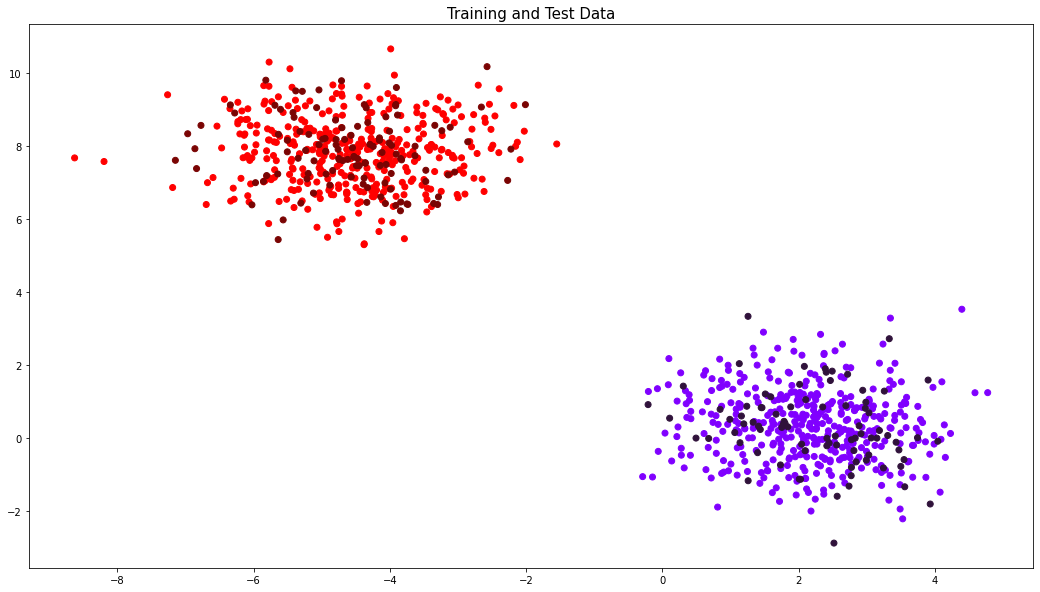

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(18,10))
ax.set_title("Training and Test Data", fontsize=15)
train = ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="rainbow")
test = ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="turbo")

In [11]:
lr = LogisticRegression()
lr.train(X_train, y_train)

Epoch: 1	 Loss: 1.2329354230539284
Epoch: 100	 Loss: 0.005817897760014881
Epoch: 200	 Loss: 0.0034827645545393664
Epoch: 300	 Loss: 0.002556723086679948
Epoch: 400	 Loss: 0.002042690668745351
Epoch: 500	 Loss: 0.0017108438399970108
Epoch: 600	 Loss: 0.0014770285207839657
Epoch: 700	 Loss: 0.0013025606742526382
Epoch: 800	 Loss: 0.0011669394214322767
Epoch: 900	 Loss: 0.0010582055964453373
Epoch: 1000	 Loss: 0.0009689617422063324
Done 🥳. Training took 2.995859146118164 seconds.


### Test the Model

In [12]:
accuracy_train, f1_train = lr.test(X_train, y_train)
print(f"The accuracy_train on the training set is {accuracy_train * 100} %")
print(f"The f1_train score on the training set is {f1_train * 100} %")

The accuracy_train on the training set is 100.0 %
The f1_train score on the training set is 100.0 %


In [13]:
accuracy_test, f1_test = lr.test(X_test, y_test)
print(f"The accuracy on the test set is {accuracy_test * 100} %")
print(f"The F1 score on the test set is {f1_test * 100} %")

The accuracy on the test set is 100.0 %
The F1 score on the test set is 100.0 %


### Decision Boundary

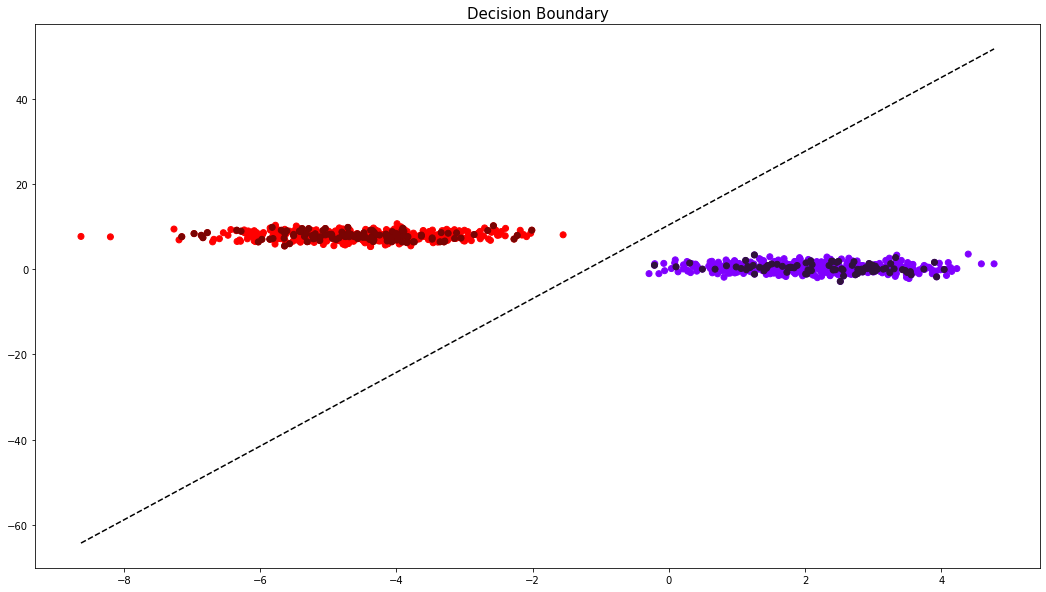

In [14]:
w = lr.w
a = -w[0] / w[1]
xx = np.linspace(X[:,0].min(), X[:,0].max())
yy = a * xx - (lr.b) / w[1]

fig, ax = plt.subplots(1, 1, figsize=(18,10))
_ = ax.scatter(X[:,0], X[:,1], c=y, cmap="rainbow")
_ = ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="turbo")
_ = ax.plot(xx, yy, 'k--', c="black")
_ = ax.set_title("Decision Boundary", fontsize=15)

## Multinomial (Multi-class) Classification

In multinomial (or softmax) logistic regression, our ground truth labels consist of more than just two classes.

### The Softmax Function

The softmax function is a generalization of the sigmoid function for more than two classes. It takes an arbitrarily-sized vector and maps all values in the range $[0,1]$ where the sum of all values equals $1$:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^Ce^{z_j}}
$$

where $C$ is the number of classes and $1\leq i \leq C$.

In [15]:
def softmax(z):
    z -= np.max(z) # for numerical stability
    exp = np.exp(z)
    return exp / np.sum(exp, axis=-1, keepdims=True)

### The Categorical Cross-Entropy Loss Function

The loss function for an input observation $\mathbf{x^{(i)}}$ is defined as the sum over the logs of the $C$ category output classes:

$$
L_{CE}(\hat{y},y)=-\sum_{c=1}^C\delta_{y,c}\log{p(y=c\vert x)} \\
= -\sum_{c=1}^C\delta_{y,c}\log{\text{softmax}(w_c\cdot\mathbf{x}+b_c)}
$$

where $\delta_{y,c}$ is $1$ if $y=c$ and $0$ otherwise.

In [16]:
def categorical_ce_loss(y_hat, y):
    return - np.sum(y * np.log(y_hat))

### Gradient Descent

The gradient is defined as follows:

$$
\frac{\partial L_{CE}}{\partial w_c} = -\Big(\delta_{y,c} - \text{softmax}(w_c\cdot\mathbf{x}+b_c)\Big)x_c
$$

### Code

In [17]:
class MultinomialLogisticRegression:
    
    def predict(self, X):
        return softmax(X.dot(self.W) + self.b)
    
    def train(self, X, y, batch_size=8, learning_rate=0.01, n_epochs=1000):
        """
        Run logistic regression training on the given training set.

        Parameters
        ----------
        X : array (2-D)
            the training examples of shape [n_examples, n_features].
        y : array (1-D)
            the ground truth labels associated with the training set of shape [n_examples,].
        batch_size : int, default: 8
            mini-batch size for training.
        learning_rate : float, default: 0.01
            the learning rate.
        n_epochs : int, default: 2000
            the number of epochs used for training. 
        """
        n_examples, n_features = X.shape
        
        # 1. Initialize Parameters
        self.W = np.random.randn(n_features, n_classes)
        self.b = np.random.randn(n_classes)
        
        self.losses = []
        
        start = time()
        for i in range(n_epochs):
            
            running_loss = []
            n_batches = 0
            
            # 2. Generate and shuffle mini-batches
            for X_batch, y_batch in next_batch(X, y, batch_size):
                
                # 3. Compute y_hat for the mini-batch
                y_hat = self.predict(X_batch)
                
                # 4. Compute loss
                loss = (1 / batch_size) * np.sum(categorical_ce_loss(y_hat, y_batch))
                running_loss.append(loss)
                
                # 5. Compute the gradients
                grad_W = (1 / batch_size) * X_batch.T.dot(y_hat - y_batch)
                grad_b = (1 / batch_size) * np.sum(y_hat - y_batch)
                
                # 6. Update parameters
                self.W -= learning_rate * grad_W
                self.b -= learning_rate * grad_b
                
                n_batches += 1
            
            epoch_loss = sum(running_loss) / n_batches
            self.losses.append(epoch_loss)
            if i == 0 or (i + 1) % 100 == 0:
                print(f"Epoch: {i + 1}\t Loss: {epoch_loss}")
        
        elapsed = time() - start
        print(f"Done 🥳. Training took {elapsed} seconds.")
            
    def test(self, X, y):
        """
        Test trained model on the given test set.

        Parameters
        ----------
        X : array (2-D)
            the test examples of shape [n_examples, n_features].
        y : array (2-D)
            the one-hot encoded ground truth labels associated with the test set of shape [n_examples, n_classes].
            
        Returns
        ----------
        accuracy : float
            how accurately the test set was predicted
        """
        y_hat = self.predict(X)
        predictions = np.argmax(y_hat, axis=1)
        diff = predictions - y
        n = len(y)
        tp = len(diff[diff == 0])
        return tp / n

In [18]:
def one_hot(y, n_classes):
    eye = np.eye(n_classes)
    return eye[y]

### Run Training

We run training on a random classification data.

In [19]:
n_classes = 5
X, y = make_blobs(10000, centers=n_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

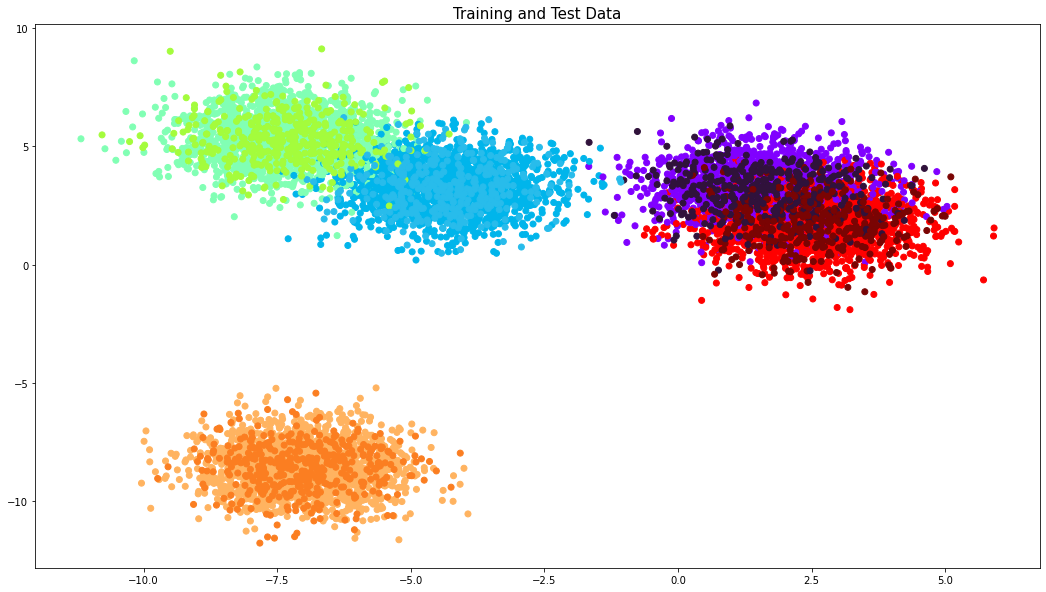

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(18,10))
ax.set_title("Training and Test Data", fontsize=15)
train = ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="rainbow")
test = ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="turbo")

In [21]:
mlr = MultinomialLogisticRegression()
mlr.train(X_train, one_hot(y_train, n_classes))

Epoch: 1	 Loss: 0.732124809641441
Epoch: 100	 Loss: 0.40071370719608784
Epoch: 200	 Loss: 0.3990702329310092
Epoch: 300	 Loss: 0.39932558147845504
Epoch: 400	 Loss: 0.39958261738745693
Epoch: 500	 Loss: 0.3989499393048704
Epoch: 600	 Loss: 0.39909882407083747
Epoch: 700	 Loss: 0.3997590411030653
Epoch: 800	 Loss: 0.3995518170717011
Epoch: 900	 Loss: 0.3994105925695309
Epoch: 1000	 Loss: 0.4000261307016242
Done 🥳. Training took 50.43649888038635 seconds.


### Test the Model

In [22]:
accuracy_train = mlr.test(X_train, y_train)
print(f"The accuracy_train on the training set is {accuracy_train * 100} %")

The accuracy_train on the training set is 86.52499999999999 %


In [24]:
accuracy_test = mlr.test(X_test, y_test)
print(f"The accuracy on the test set is {accuracy_test * 100} %")

The accuracy on the test set is 86.25 %
